## The PPDAC Cycle

In this notebook, I will use the PPDAC concept, learnt from the ,,The art of statistics. Learning from Data", written by David Spiegelhalter.

__1. PROBLEM__ 

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

__2. PLAN__

In the first part, I will collect, clean and make feature engineering on the data. 

After I make EDA (Exploratory Data Analyis) on the data, I should make a predictive model (supervised model) in order to predict whether a person will survive or not, based on the attributes it has. I will measure the metrics for more algorithms and compare them in order to find the best algorithm for this data-set.

__3. DATA__

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In this part, I will clean the data and manage it in order to make a better anaysis.

__4. ANALYSIS__

In this part, I will perform EDA. I will explore the data with descriptive statistics and summarize our variables. In this section, features will be classified and correlations will be made between variables.

Also, in this section I will build some Supervised Machine Learning models in order to find which works best for this particular data-set.

__5. CONCLUSION__

We will interpretate the metrics found out in Chapter 4 and make conclusions about the data set.

## 3: Collect, Manage and Clean Data

Since the data was given to us, all we have to do is clean it.


### Step 3.1 Import Libraries

In [1]:
import numpy as np   #foundational package for scientific computing
import pandas as pd  #collection of functions for data processing and analysis modeled after R dataframes with SQL like features

#Visualization
import matplotlib.pyplot as plt #collection of functions for scientific and publication-ready visualization
import seaborn as sns

# Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics	

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 3.2 Overview data

In [2]:
#Convert CSV for train to pandas df
data_train =  pd.read_csv("train.csv")
#Convert CSV for test to pandas df
data_test =  pd.read_csv("test.csv")
#Combine test and train for cleaning
data = pd.concat([data_train, data_test], axis = 0, sort = False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
#Check for any duplicated data
data.duplicated().sum()

0

In [5]:
#Show statistics about the data
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


### Step 3.3 Clean Data

There are four columns with missing values (Age, Cabin, Fare, Embarked). Survived column has Nulls because the Test dataset does not have that information (that is the task).

In [6]:
# First, let's see how many null values are in the dataset
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

The Cabin variable can be used to determine the approximate position on ship when the incident occured. However, since there are way too many null values, I will drop it.

In [7]:
#We will complete the missing values and drop unnecessary columns

#Complete Embarked with the mode (the value that repeats the most) -> is discrete so mode makes sense
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

#Complete Fare with the median value (continous variable)
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

#Drop the Cabin column
data = data.drop(columns=["Cabin", "Ticket"])

In [8]:
#For the Age column, I will extract the title and based on it, I will complete the missing values

def extract_title(name):
    '''
    The function's role is to extract the person title from the Name column
    
    Parameters:
    name -> The full name of the person.
    
    Return:
    title -> The extracted title, converted to lowercase and stripped of unwanted characters.
    '''
    
    # Split the text by commas and get the second element
    title_section = name.split(", ")[1]
    
    # Split the title section into words
    words = title_section.split(".")
    
    #We apply .lower() to make the text lowercase and .strip() to get rid of unwanted characters
    title = words[0].lower().strip('., ')
    
    return title

# Make a new column named Title and extract the titles
data["Title"] = data["Name"].apply(extract_title)

print(data["Title"].value_counts())

# In this case, we know the titles, but we have to make the assumption that there could be more.
# So I am going to make a special category called rare_titles

#Count the occurances of each title
title_counts = data["Title"].value_counts()
#I set the treshold to 10 (arbitrary)
rare_titles = title_counts[title_counts < 10].index
#Put all the titles with less than 10 occurances in a special category called "rare_titles"
data.loc[data["Title"].isin(rare_titles), "Title"] = "rare_titles"

print(data["Title"].value_counts())

Title
mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: count, dtype: int64
Title
mr             757
miss           260
mrs            197
master          61
rare_titles     34
Name: count, dtype: int64


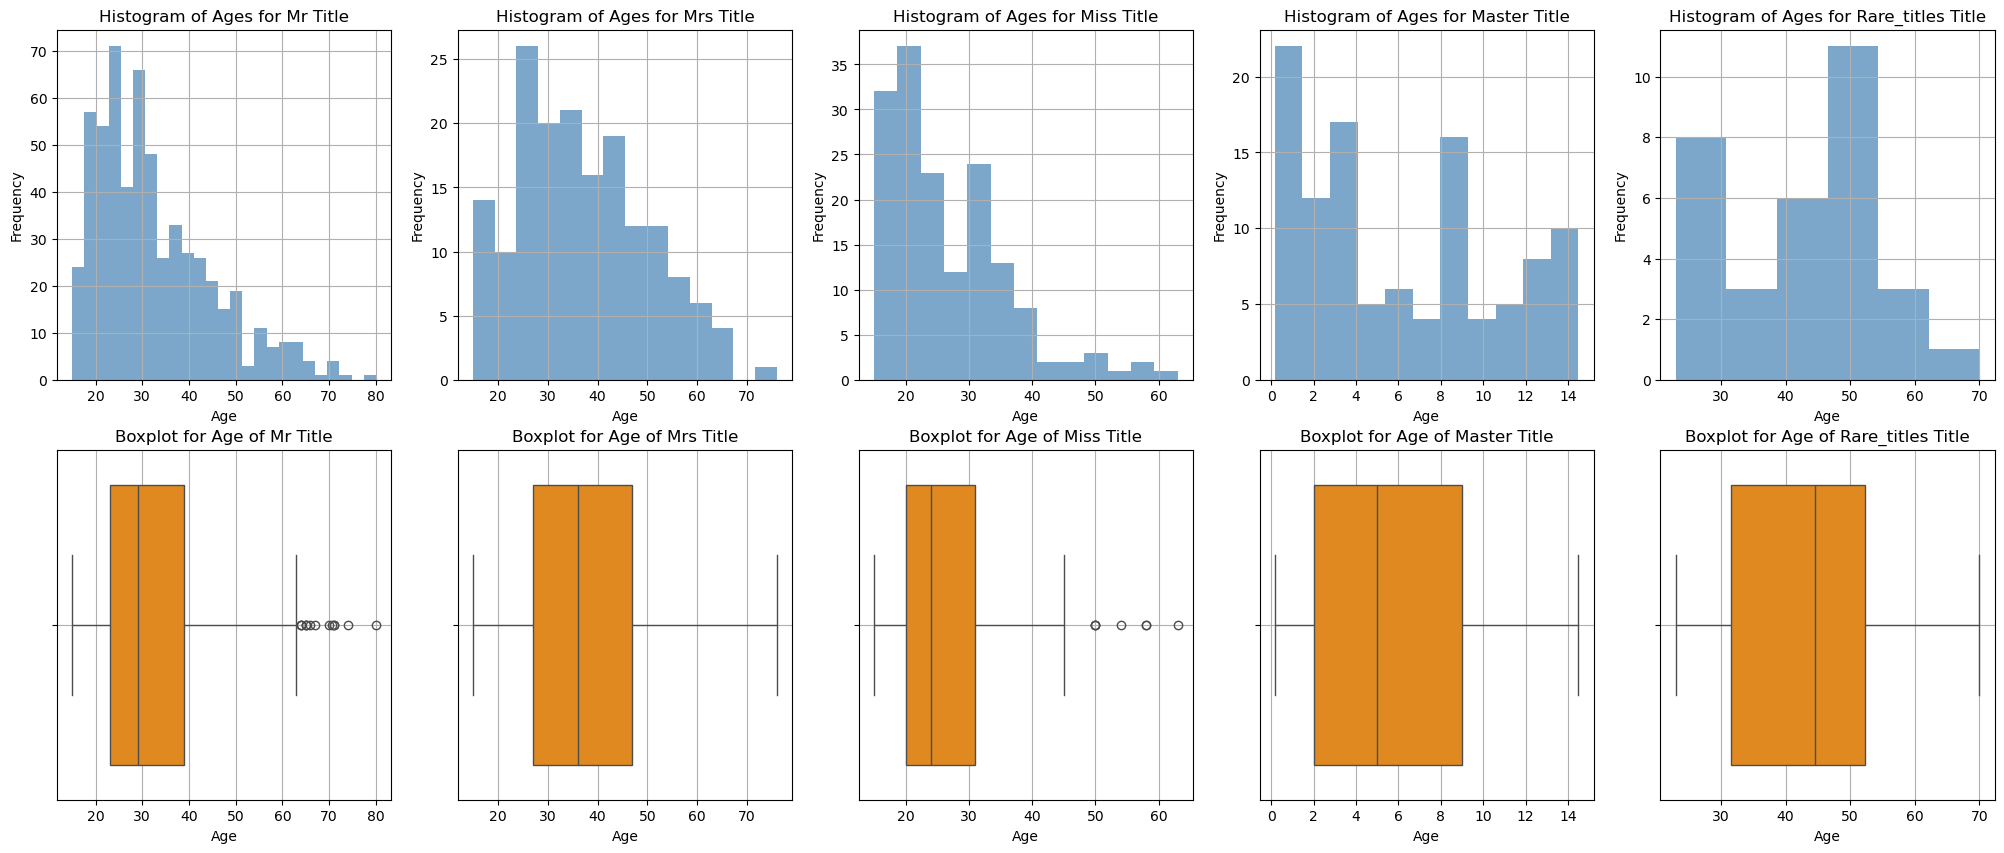

Title
mr             752
miss           210
mrs            196
master         117
rare_titles     34
Name: count, dtype: int64


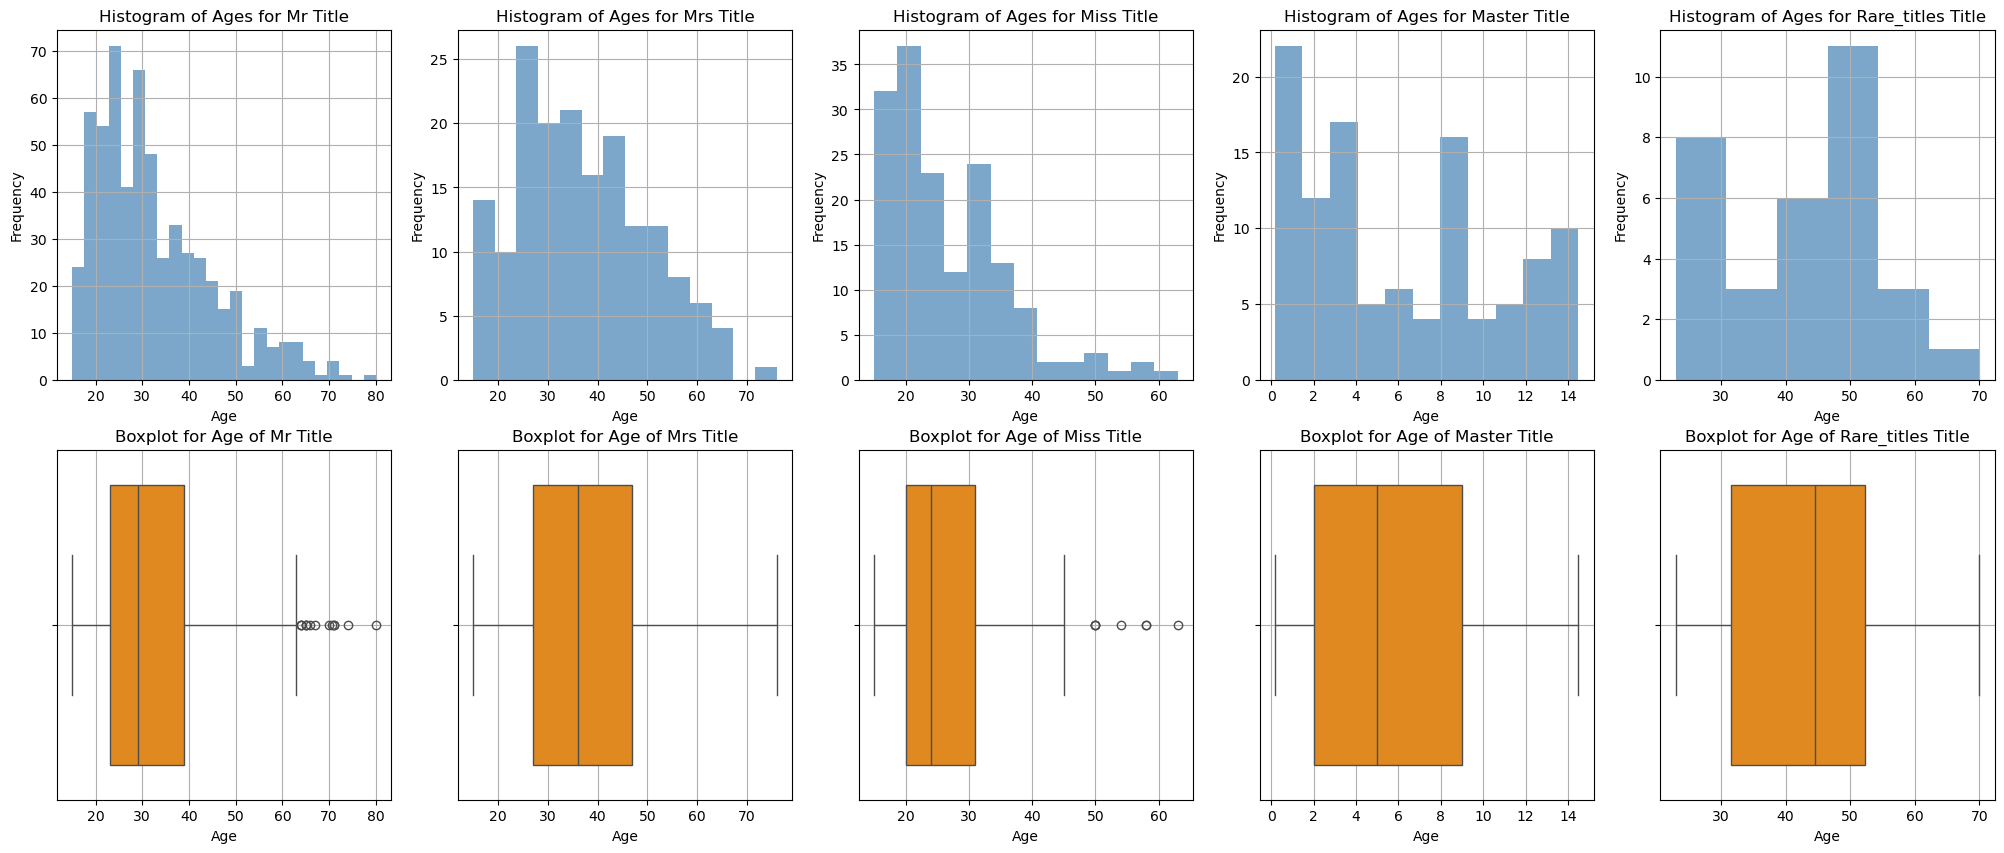

In [11]:
def plot_histogram_and_boxplot(df, eliminate_outliers):
    
    '''
    This functions' role is to plot for each title the histogram and boxplot.
    
    Parameters:
    data(pd.DataFrame) -> The dataframe containing the data to plot
    eliminate_outliers -> if 1, calculate IQR and eliminate outliers with the 1.5 * IQR rule
    
    Return:
    None. This function outputs the plots.
    '''
    
    #Extract unique titles
    titles = df["Title"].unique()
    
    # Determine the number titles
    num_titles = len(titles)
    
    # Create subplots with 2 rows and num_titles columns
    fig, axes = plt.subplots(2, num_titles, figsize=(5 * num_titles, 10)) 
    
    for i, title in enumerate(titles):
    
        #We make the filter to filter the dataframe to get only the ages of those with the title: title
        mask_age = ((df["Title"] == title) & (df["Age"].notnull()))
        df_hist = df[mask_age]
        
        #We calculate the optimal number of bins
        nr_bins = int(np.floor(np.sqrt(df_hist["Age"].count())) + 1)

        # Plot histogram
        ax_hist = axes[0, i]
        ax_hist.hist(df_hist["Age"], bins=nr_bins, color="steelblue", alpha=0.7)
        ax_hist.set_xlabel("Age")
        ax_hist.set_ylabel("Frequency")
        ax_hist.set_title(f"Histogram of Ages for {title.capitalize()} Title")
        ax_hist.grid()

        # Plot boxplot
        ax_box = axes[1, i]
        sns.boxplot(x=df_hist["Age"].reset_index(drop=True), ax=ax_box, color = "darkorange")
        ax_box.set_title(f"Boxplot for Age of {title.capitalize()} Title")
        ax_box.grid()
    
    plt.show()


plot_histogram_and_boxplot(data, 0)

# From the graphs below, we see that Master tile, which are kids have the ages approximately between (0, 15)
#So, I am goin to convert the title for all the people with the age < 15 to master
data.loc[data["Age"] < 15, "Title"] = "master"
print(data["Title"].value_counts())

plot_histogram_and_boxplot(data, 1)

In [12]:
#Complete Age with the median value for each title (continous variable) 

data_mean_age_title = round(data["Age"].groupby(data["Title"]).median(), 1).reset_index().set_index("Title")
data.loc[data["Age"].isnull(), "Age"] = data.loc[data["Age"].isnull(), "Title"].map(data_mean_age_title["Age"]) 

### Step 3.4 Feature Engineering + Convert Formats

We will generate new columns with respect to the columns we already have in order to put into the spotlight new information.

We will convert categorical data to numbers in order to be able to make analysis on that data.


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,mr


In [15]:
# We combine SibSp and Parch into one single column named: ,,Family"
data["Family"] = data["SibSp"] + data["Parch"] + 1

#IF there is only 1 member in the family, maybe it would be better to also have a binary column
data["Single"] = 1
data.loc[data["Family"] != 1, "Single"] = 0

In [16]:
# We should split the train and test sets into 2 separate values since we finished cleanin the dataset

train = data.loc[data["Survived"].notnull()]
test  = data.loc[data["Survived"].isnull()]

#Convert Survived data type from float to int64
train["Survived"] = train["Survived"].astype('int64')

### Step 3.5 Final Check of Cleaned Data

We should make a final check in order to find out if there are any missing values before starting the EDA process.

In [17]:
print('Train columns with null values: \n', train.isnull().sum())
print('-' * 10)

print('Test columns with null values: \n', test.isnull().sum())
print('-' * 10)

Train columns with null values: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Family         0
Single         0
dtype: int64
----------
Test columns with null values: 
 PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
Family           0
Single           0
dtype: int64
----------


## 4: Analysis

### 4.1 Visualizing and analyzing the data

Since we cleaned our data, we can explore the data with descriptive statistics to describe the variables. We will find the correlations between inputs and output.

In [18]:
#First we will make a function in order to see:
# 1. how many people were male/female and the proportion they represented from the population
# 2. how many people  suvived/died and the proportion they represented from the population

def split_population_by_category(data, columns, category):
    
    '''
     Plots count plots for each feature in the specified columns,
     split by the values in the specified category column, and prints the percentage,
     distribution of the category values for each feature.
     
     Parameters:
     data(pd.DataFrame) -> The dataframe containing the data to plot and analyze.
     columns (list of str) -> The list of column names for which to create count plots.
     category (str): The column name by which to split the count plots and calculate percentages.
     
     Returns:
     None: The function outputs the plots and prints the percentage tables.
     
    '''
    
    plt.figure(figsize = (24,22))
    sns.set(font_scale = 1.2)
    sns.set_style('ticks')
    
    # Get unique values of the category column
    unique_values = data[category].unique()
    
    # Determine the number of unique values
    num_unique_values = len(unique_values)
    
    # Create a palette with unique colors for each category value
    palette = sns.color_palette("dark", len(unique_values))
    color_dict = dict(zip(unique_values, palette))
    
    
    for i, feature in enumerate(columns):
        plt.subplot(3,3,i+1)
        sns.countplot(data=data, x=feature, hue=category, palette=color_dict)
        plt.title(f"Distribution of {feature} by {category}")
    
    plt.show()
    
    #Initialize a dictionary to store percentage values
    percentage_values = {}

    for feature in columns:
        # Calculate total count for each category
        total_count = data.groupby(feature).size()

        # Calculate count for each category split by 'Sex'
        count_by_category = data.groupby([feature, category]).size().unstack().fillna(0)

        # Calculate percentages
        percentage_by_category = (count_by_category.div(total_count, axis=0) * 100).round(2)

        # Store the results
        percentage_values[feature] = percentage_by_category

    # Print the percentage values
    for feature, df in percentage_values.items():
        print(f"Percentage values for {feature}:")
        print(df)
        print("\n")
        
discrete_columns = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Survived', 'Title', 'Family', 'Single']

The following figure show us numeric columns vs Sex column.

We observe that:
Since the number of males is way bigger than the number of females, there is a mislead in the proportions. It will be more important to also analyze the same graphs as the ones below but splitted by the Survived category.
We will combine the informations from both of the graphs.

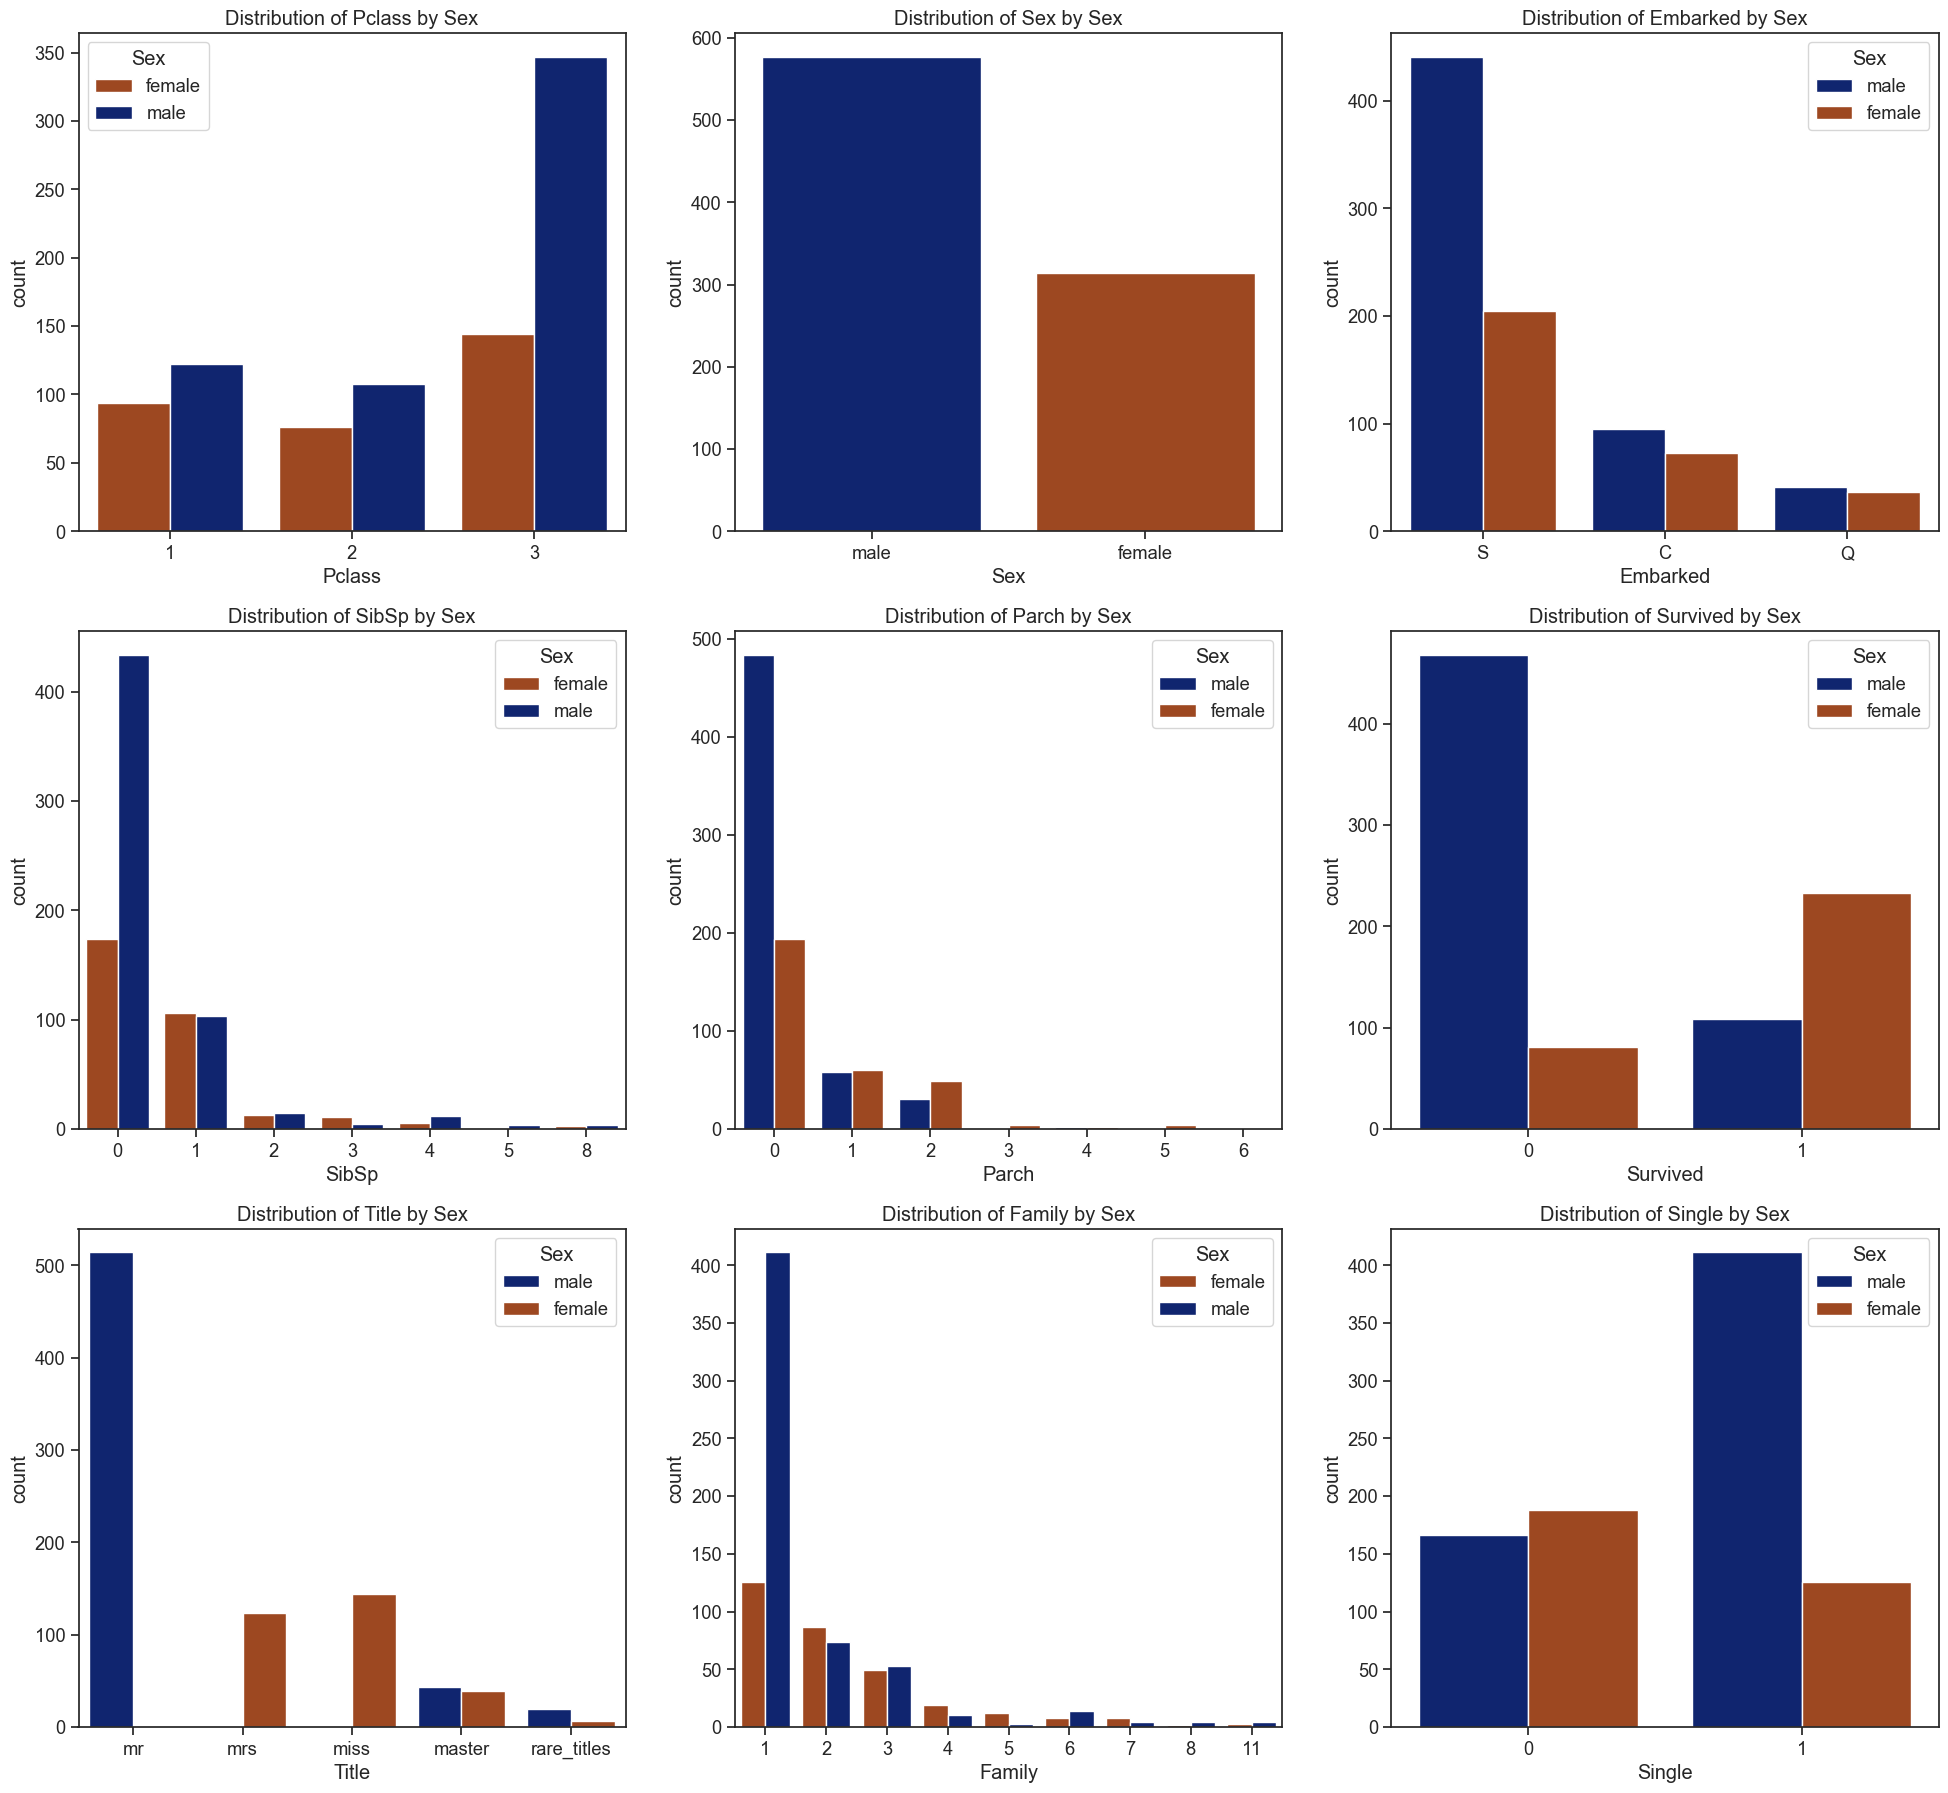

Percentage values for Pclass:
Sex     female   male
Pclass               
1        43.52  56.48
2        41.30  58.70
3        29.33  70.67


Percentage values for Sex:
Sex     female   male
Sex                  
female   100.0    0.0
male       0.0  100.0


Percentage values for Embarked:
Sex       female   male
Embarked               
C          43.45  56.55
Q          46.75  53.25
S          31.73  68.27


Percentage values for SibSp:
Sex    female   male
SibSp               
0       28.62  71.38
1       50.72  49.28
2       46.43  53.57
3       68.75  31.25
4       33.33  66.67
5       20.00  80.00
8       42.86  57.14


Percentage values for Parch:
Sex    female   male
Parch               
0       28.61  71.39
1       50.85  49.15
2       61.25  38.75
3       80.00  20.00
4       50.00  50.00
5       80.00  20.00
6      100.00   0.00


Percentage values for Survived:
Sex       female   male
Survived               
0          14.75  85.25
1          68.13  31.87


Percentage values

In [19]:
split_population_by_category(train, discrete_columns, 'Sex')

The following figure show us numeric columns vs Survived column.

We observe that:
 
There were more SINGLE males than females. From the figure above, we found out that from all the SINGLE people, there were 76.54% males and 23.46% females (possible an important criteria in the context of survival). From the figure below, only 30.35% of single people survived, whereas if the had a family, the odds improved to 50.56%. 
Is imporatnt also to see that based on the number of family members, the odds change dramatically. For example, all  Families with more than 1 member (they are alone), had a positive rate of survival if they were between 2 and 4 members (could also be because there were mostly women in those families, as we can see from the graphs).

The Sex with respect to Survived graph shows us that males had a disastrous chance to being saved. If in the precedent figure we found out that from all the people who died, 14.75% were females and 85.25% were males, this time we find that from all the males, only 18.89% SURVIVED and from all the females, only 74.20% survived. With both the informations provided, we can conlcude that Sex is, probably, the most important criteria yet.
 
Another observation is that if we watch both the graphs corresponding to Embarked, we see an anomaly. Dispite the fact that more males embarked in port "C" ( 56.55%), the survival rate for the people in that port is positive (55.36%), whereas the rest of the ports had the same proportions (women embarked - survived for that embarked).

The Title category is also interesting. We already know that women had very high chances of survival, respectively males very low. Is interesting to see the Childer category, where we see that 57.32% survived. This is validating the information that children, along with women, had priority to being saved.

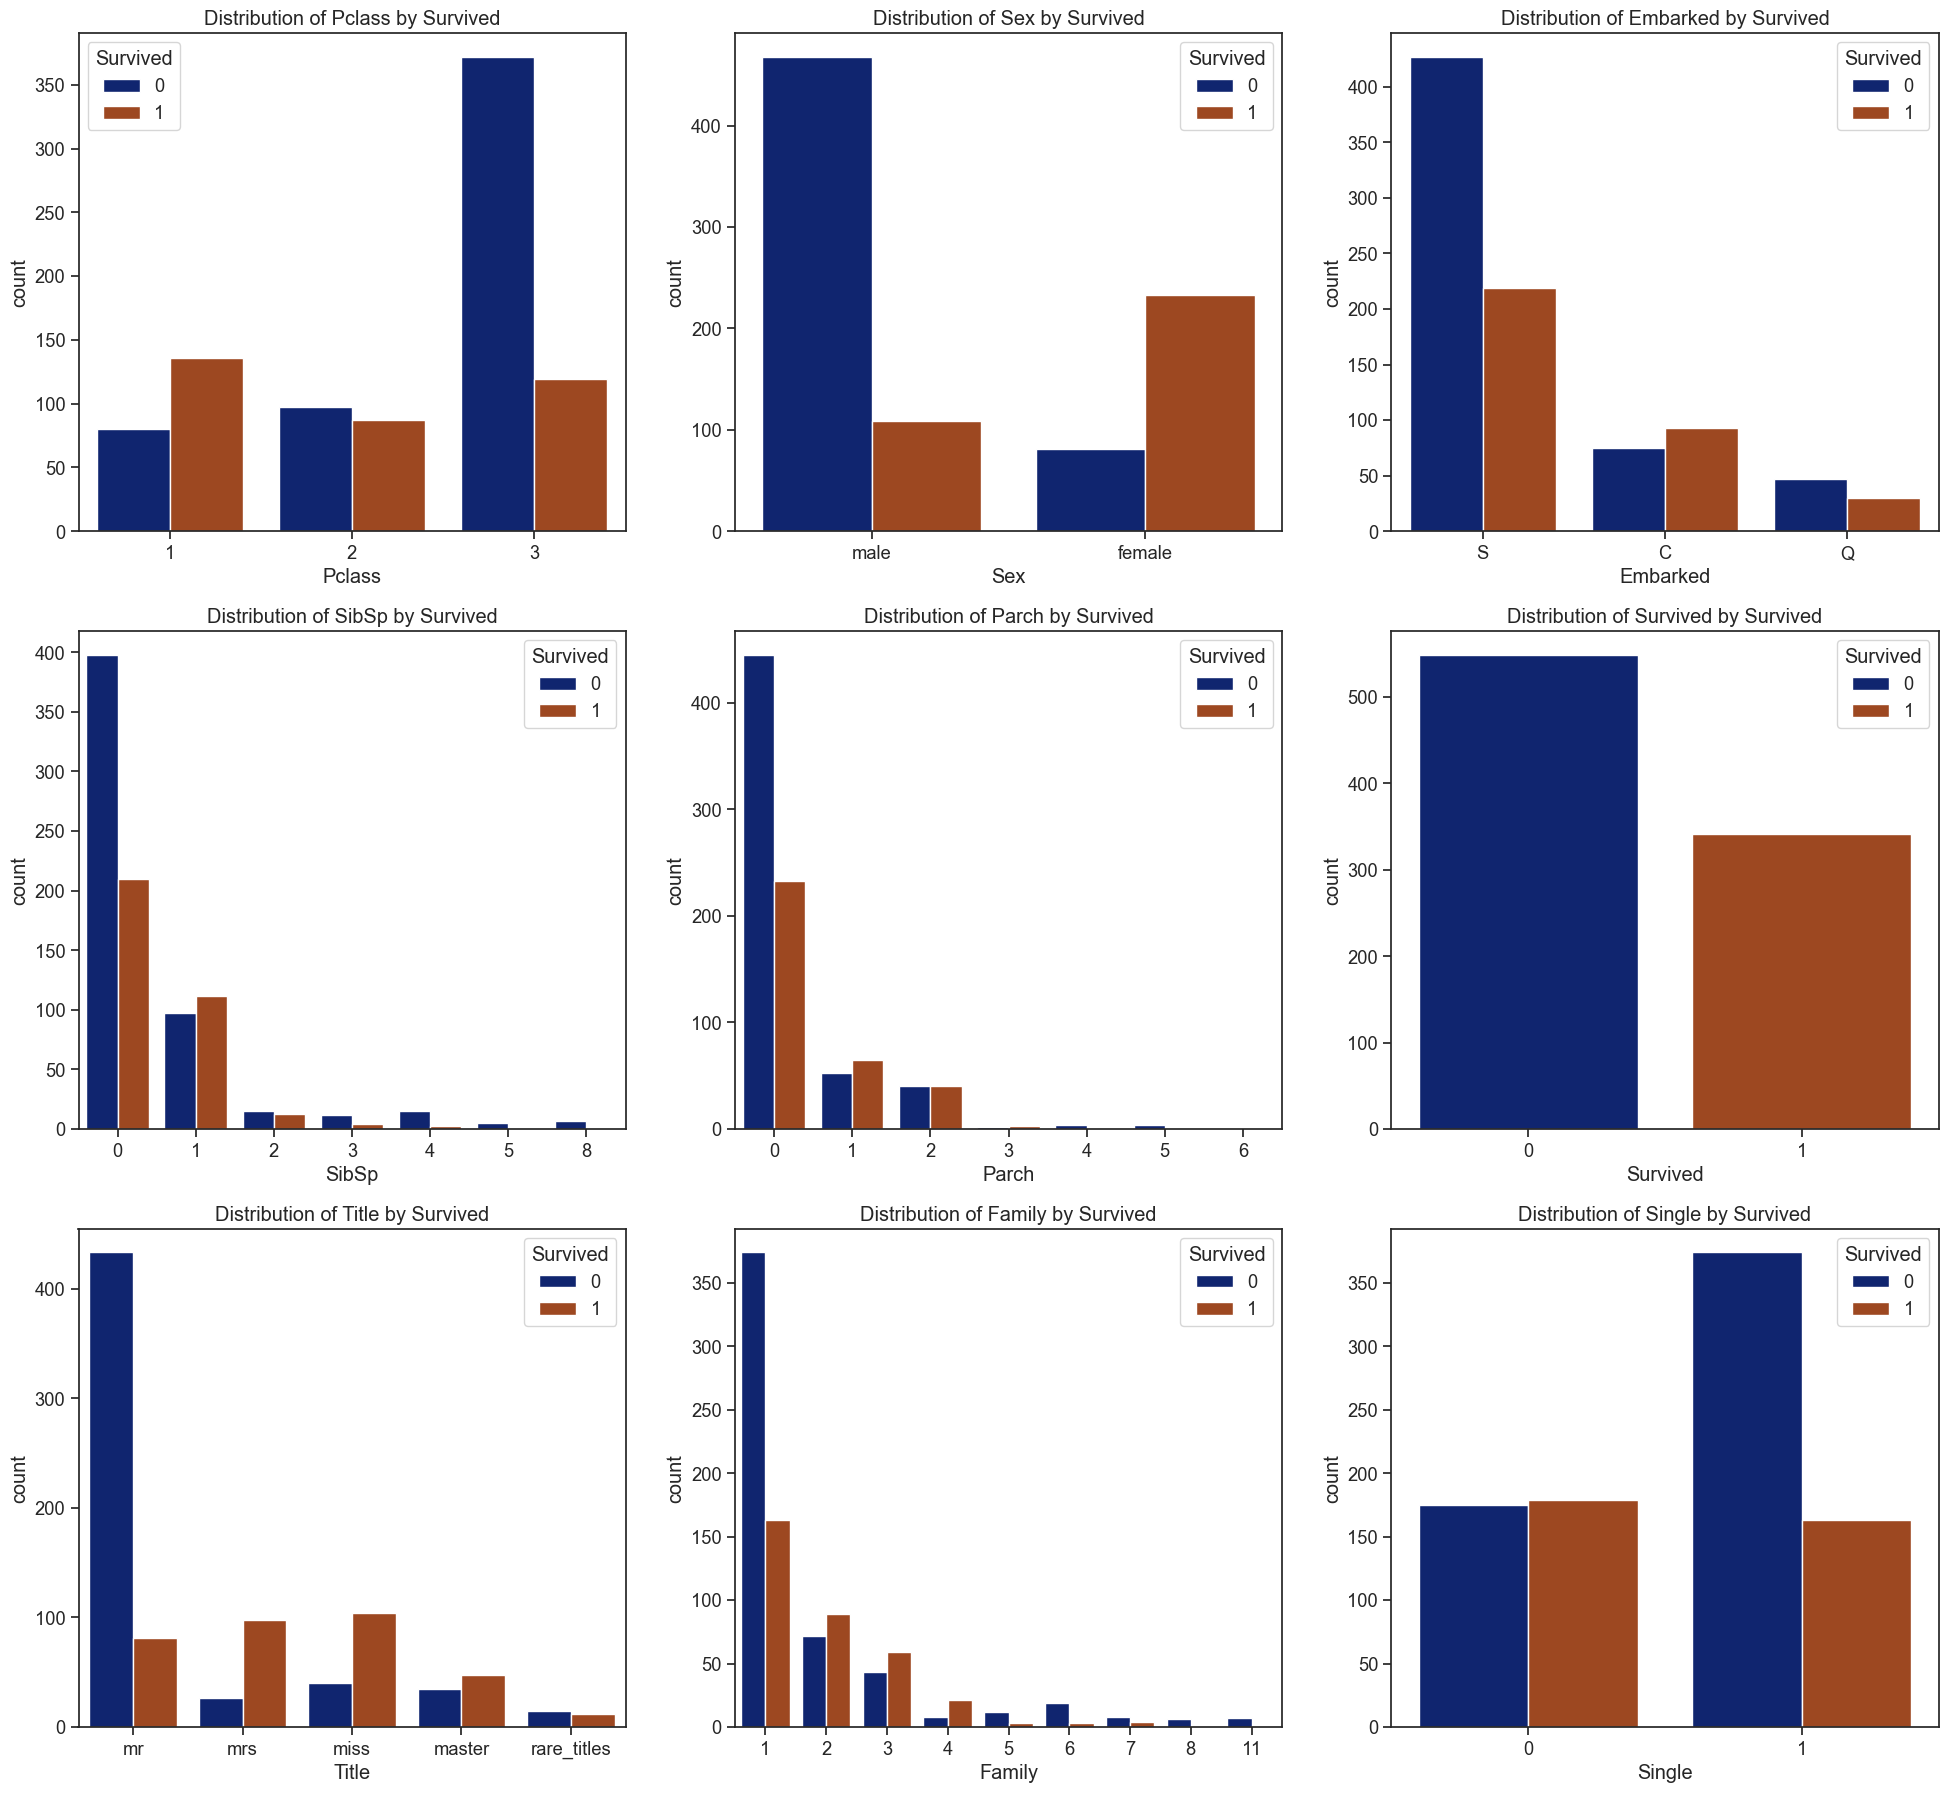

Percentage values for Pclass:
Survived      0      1
Pclass                
1         37.04  62.96
2         52.72  47.28
3         75.76  24.24


Percentage values for Sex:
Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


Percentage values for Embarked:
Survived      0      1
Embarked              
C         44.64  55.36
Q         61.04  38.96
S         66.10  33.90


Percentage values for SibSp:
Survived       0      1
SibSp                  
0          65.46  34.54
1          46.41  53.59
2          53.57  46.43
3          75.00  25.00
4          83.33  16.67
5         100.00   0.00
8         100.00   0.00


Percentage values for Parch:
Survived       0      1
Parch                  
0          65.63  34.37
1          44.92  55.08
2          50.00  50.00
3          40.00  60.00
4         100.00   0.00
5          80.00  20.00
6         100.00   0.00


Percentage values for Survived:
Survived      0      1
Survived              
0         1

In [20]:
split_population_by_category(train, discrete_columns, 'Survived')

Next, we will make correlations for variables in order to understand which attributes are important.

First of all, we are going to convert the object attributes to int / float in order to make the proccessing easier.

In [21]:
#Now, we convert words to numbers for each column
train["Sex"]      = train["Sex"].map({"male": 0, "female": 1})
train["Embarked"] = train["Embarked"].map({'S':0,'C':1,'Q':2})
train["Title"]    = train["Title"].map({'mr':0,'miss':1,'mrs':2, 'master':3, 'rare_titles':4})


#Same thing for the test set
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})
test["Embarked"] = test["Embarked"].map({"C": 0, "Q": 1, "S" : 2})
test["Title"]    = test["Title"].map({'mr':0,'miss':1,'mrs':2, 'master':3, 'rare_titles':4})

We observe that the variables with high correlation coefficient with respect to Survived are : 
- Pclass with: -0.338
- Sex with the highest value (as we expected) with: 0.543
- Fare with:  0.257
- Title with: 0.4054 ->  this is caused also because Title and Sex have have a high correlation coefficient (0.558)
- SIngle with: -0.203 

In [22]:
# Select all columns exept Name
corr_list = [col for col in train if col != 'Name']

#Show the correlations between quantitative variables
corr = pd.DataFrame(train[corr_list].corr())
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Single
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.039791,-0.057527,-0.001652,0.012658,-0.030467,0.003802,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.067836,-0.035322,0.081629,0.257307,0.106811,0.405478,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.352661,0.083081,0.018443,-0.549500,0.045702,-0.130708,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.083743,0.114631,0.245489,0.182333,0.116569,0.558293,0.200988,-0.303646
Age,0.039791,-0.067836,-0.352661,-0.083743,1.000000,-0.258440,-0.184625,0.099494,-0.019403,-0.233868,-0.268871,0.177221
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.258440,1.000000,0.414838,0.159651,-0.059961,0.314158,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,0.245489,-0.184625,0.414838,1.000000,0.216225,-0.078665,0.368788,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.182333,0.099494,0.159651,0.216225,1.000000,0.062142,0.119821,0.217138,-0.271832
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.019403,-0.059961,-0.078665,0.062142,1.000000,0.035842,-0.080281,0.017807
Title,0.003802,0.405478,-0.130708,0.558293,-0.233868,0.314158,0.368788,0.119821,0.035842,1.000000,0.398956,-0.438673


### 4.2 Making some Supervised Models

In [54]:
from sklearn.metrics import accuracy_score

columns = ["Pclass", "Sex", "Title",  "Fare", "Single", "Embarked"]
X = train[columns]
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Cl#assifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Predict the response for the training dataset
y_train_pred = clf.predict(X_train)

# Calculate and print the accuracy for the training dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.8635634028892456
Accuracy: 0.8619402985074627


NOTE TO MYSELF: TO MAKE AT LEAST 2,3 more models

## 5. Conclusions

In order to see if what we did is relevant or not, we have to compare our results to the uter most questions:

1. What if we assume everyone died from a sample ?

2. What if all females survive and all males die from a sample ?

In [55]:
#Question1:
y_test_question_1 = [0] * len(y_test)
question_1_accuracy = accuracy_score(y_test, y_test_question_1)
print("Question 1 (Assume everyone died) Accuracy:", question_1_accuracy)

Question 1 (Assume everyone died) Accuracy: 0.664179104477612


In [65]:
#Question2:
y_test_question_2 = [1 if sex == 1 else 0 for sex in X_test['Sex']]
question_2_accuracy = accuracy_score(y_test, y_test_question_2)
print("Baseline 2 (All females survive, all males die) Accuracy:", question_2_accuracy)

Baseline 2 (All females survive, all males die) Accuracy: 0.8171641791044776
